In [1]:
!pip install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings as warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [8]:
Crime =pd.read_csv("C:/Users/dell/Documents/crime_data.csv")
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [9]:
Crime.shape

(50, 5)

In [10]:
# Summary of the data
Crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [14]:
# Renaming the Unnamed :0 column into States
Crime = Crime.rename(columns={'Unnamed: 0':"States"})
Crime.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [15]:
 # check for Null values
Crime.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [16]:
# check for duplicate values
Crime[Crime.duplicated()].shape

(0, 5)

In [17]:
Crime[Crime.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


<function matplotlib.pyplot.show(close=None, block=None)>

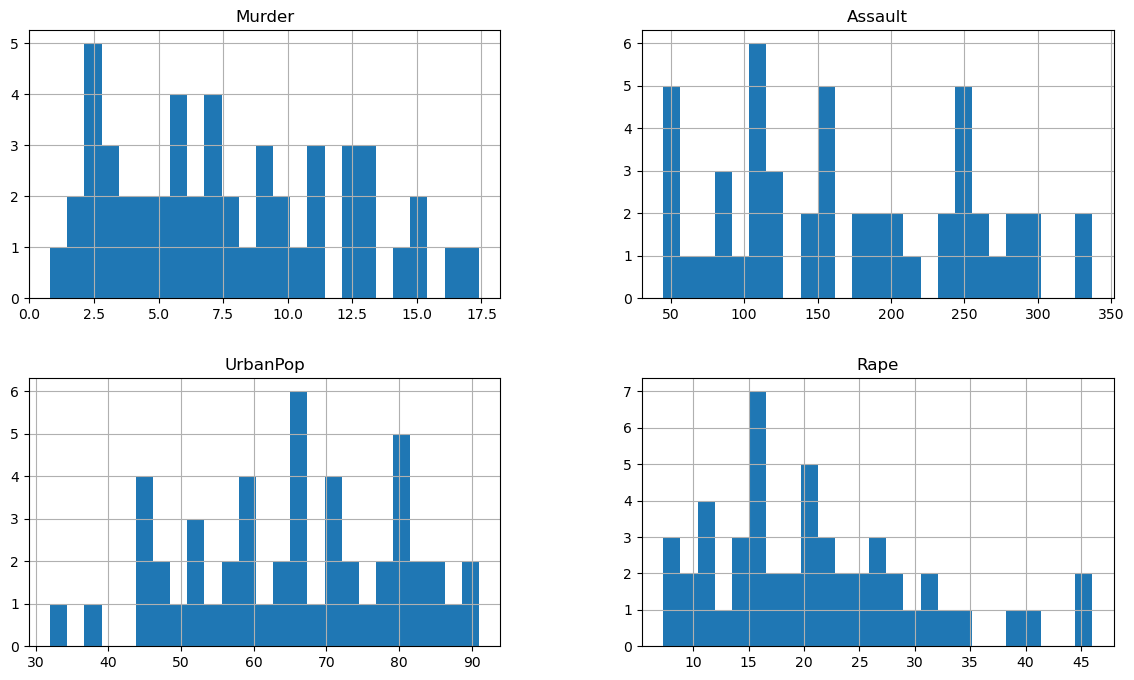

In [18]:
Crime.hist(figsize = (14,8),bins = 25)
plt.show

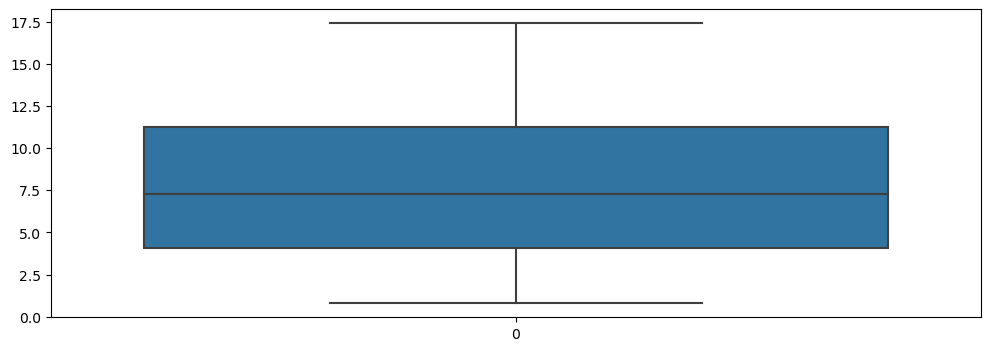

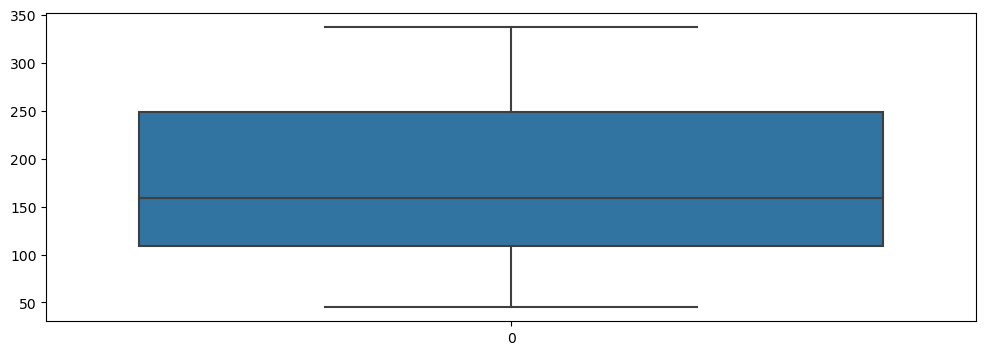

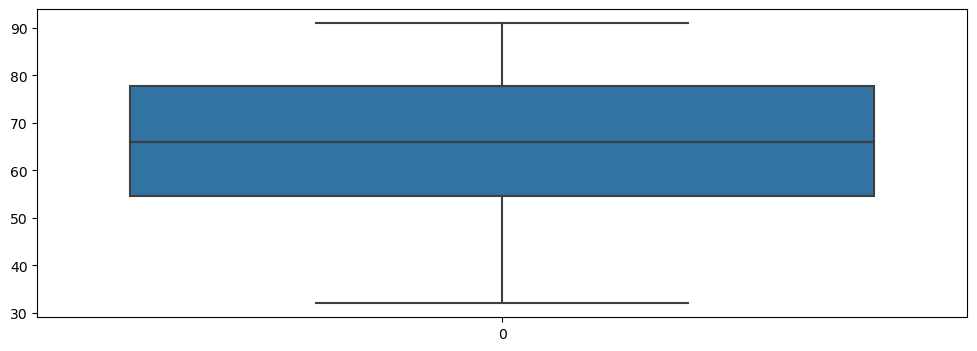

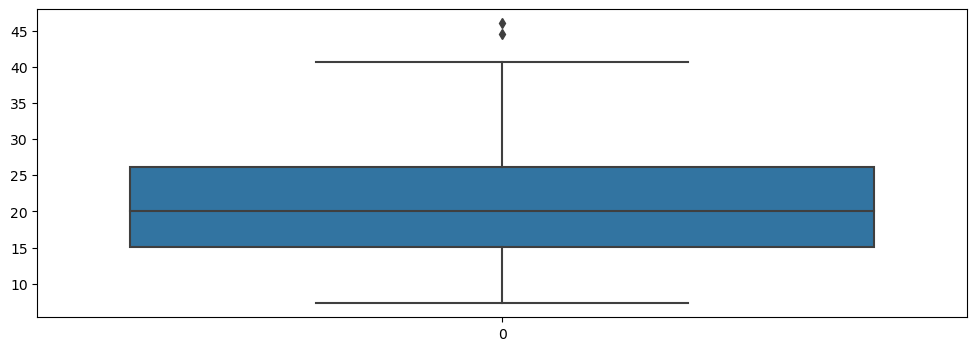

In [21]:
for feature in Crime.columns[1:]:
    plt.figure(figsize =(12,4))
    sns.boxplot(Crime[feature])

<Axes: >

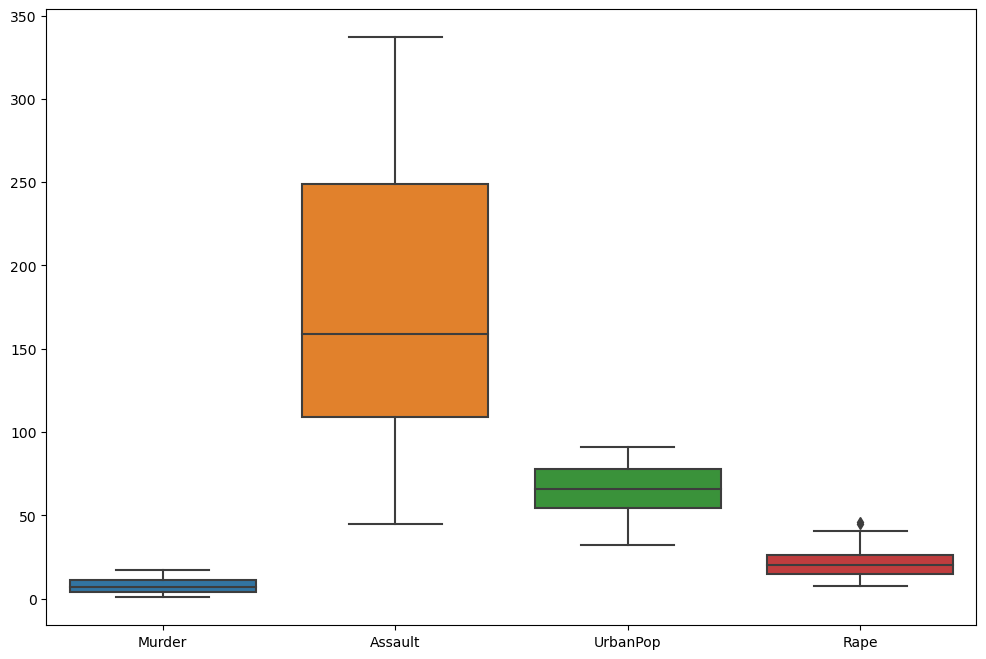

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(data=Crime)

In [ ]:
Observation 
*** we can clearly see that Assault crime rate is high. as compare to 
rape and murder crime.

In [23]:
# checking for correlation variables
Crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

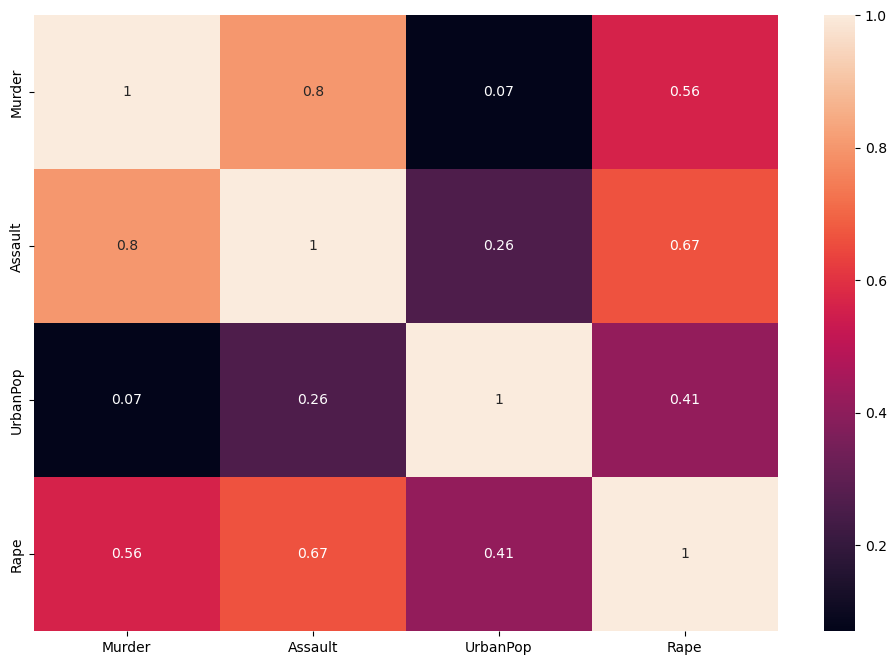

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(Crime.corr(),annot = True)
plt.show

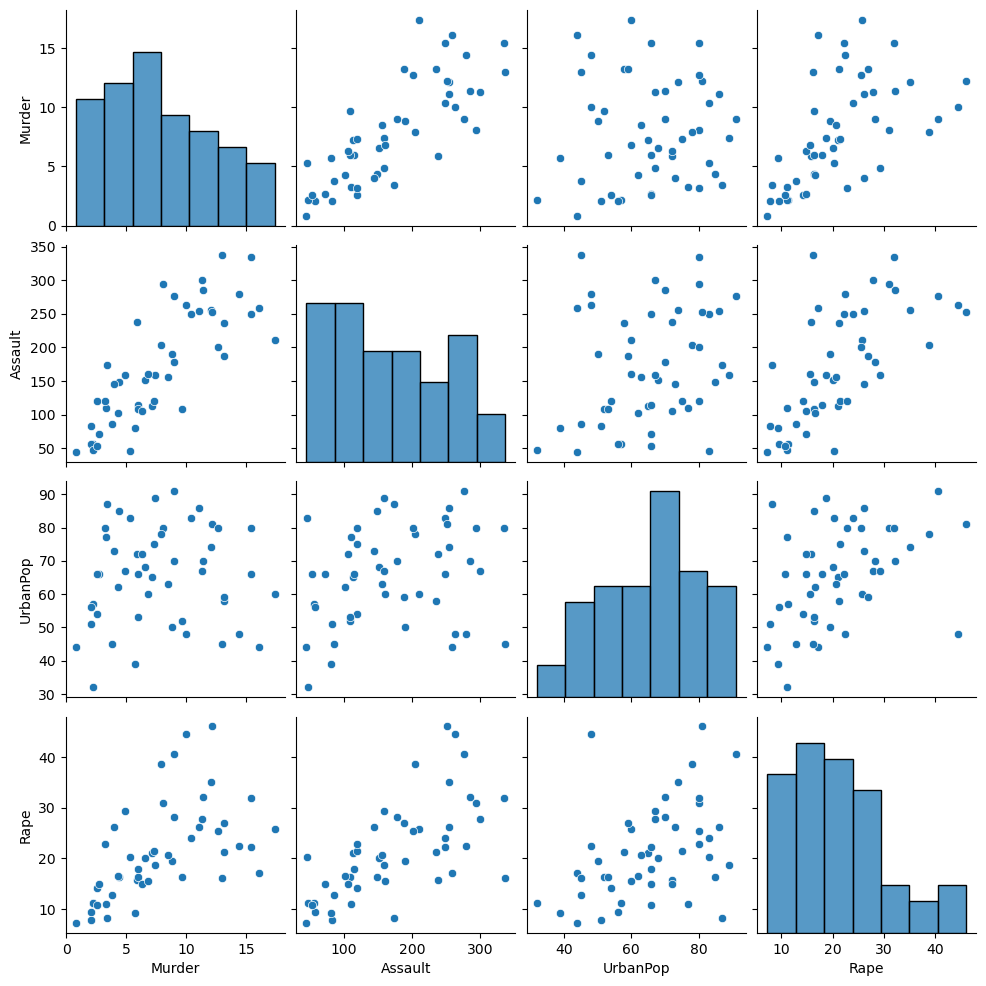

In [25]:
sns.pairplot(data=Crime)

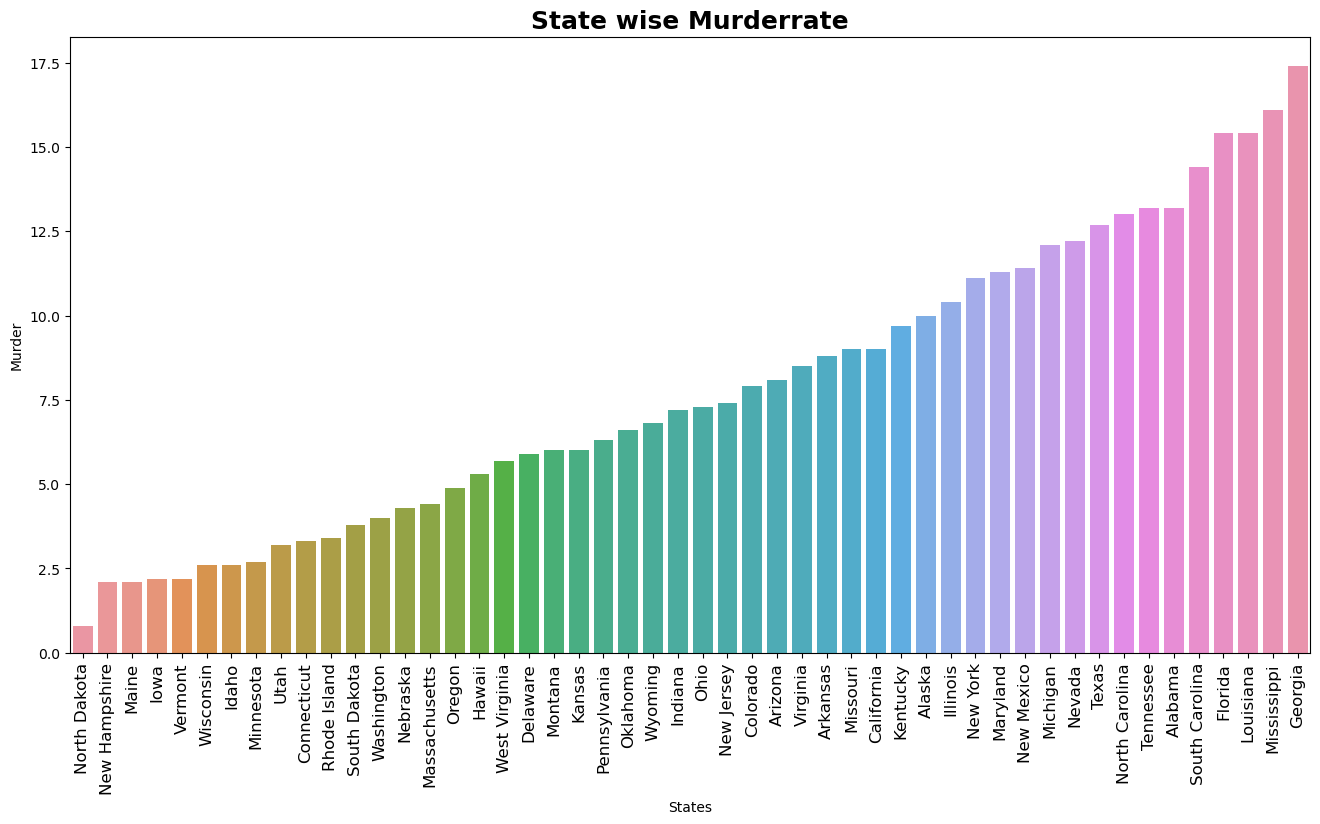

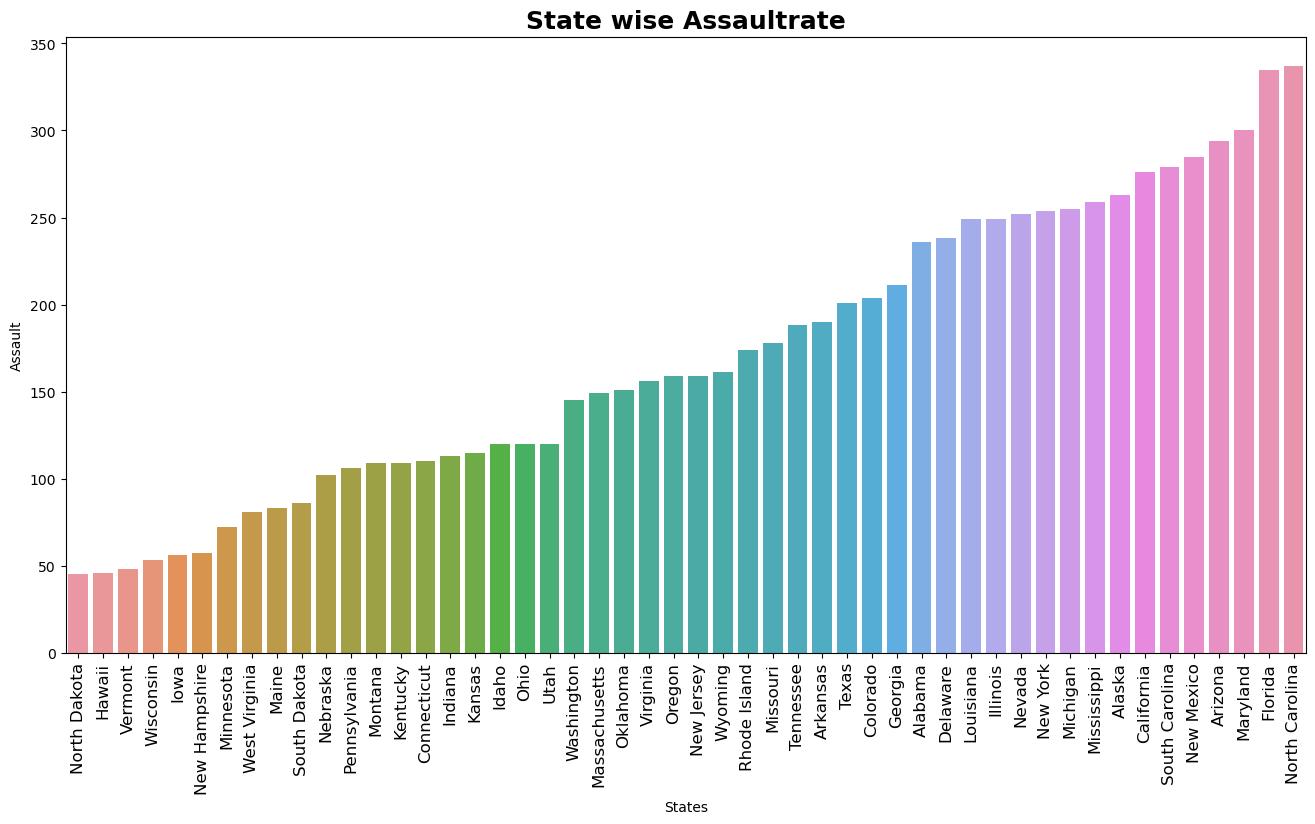

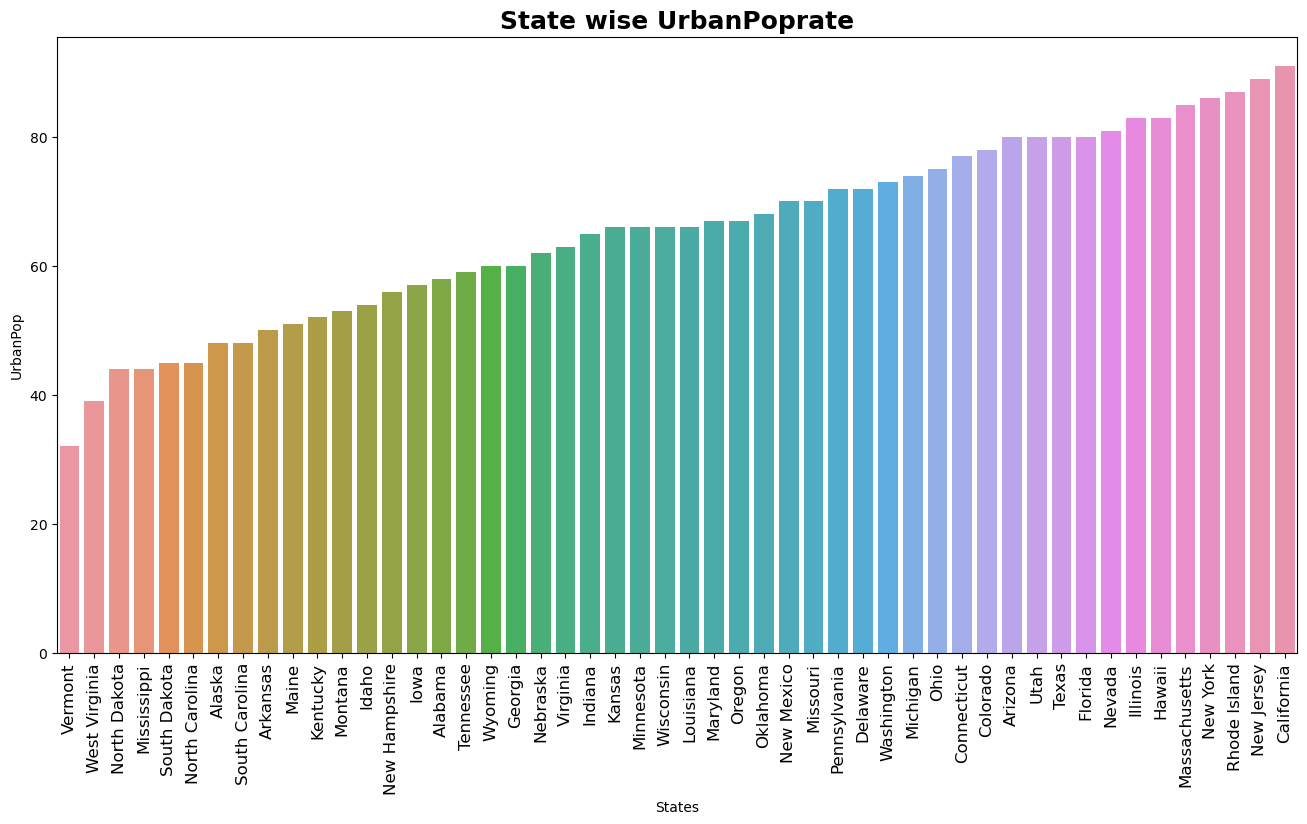

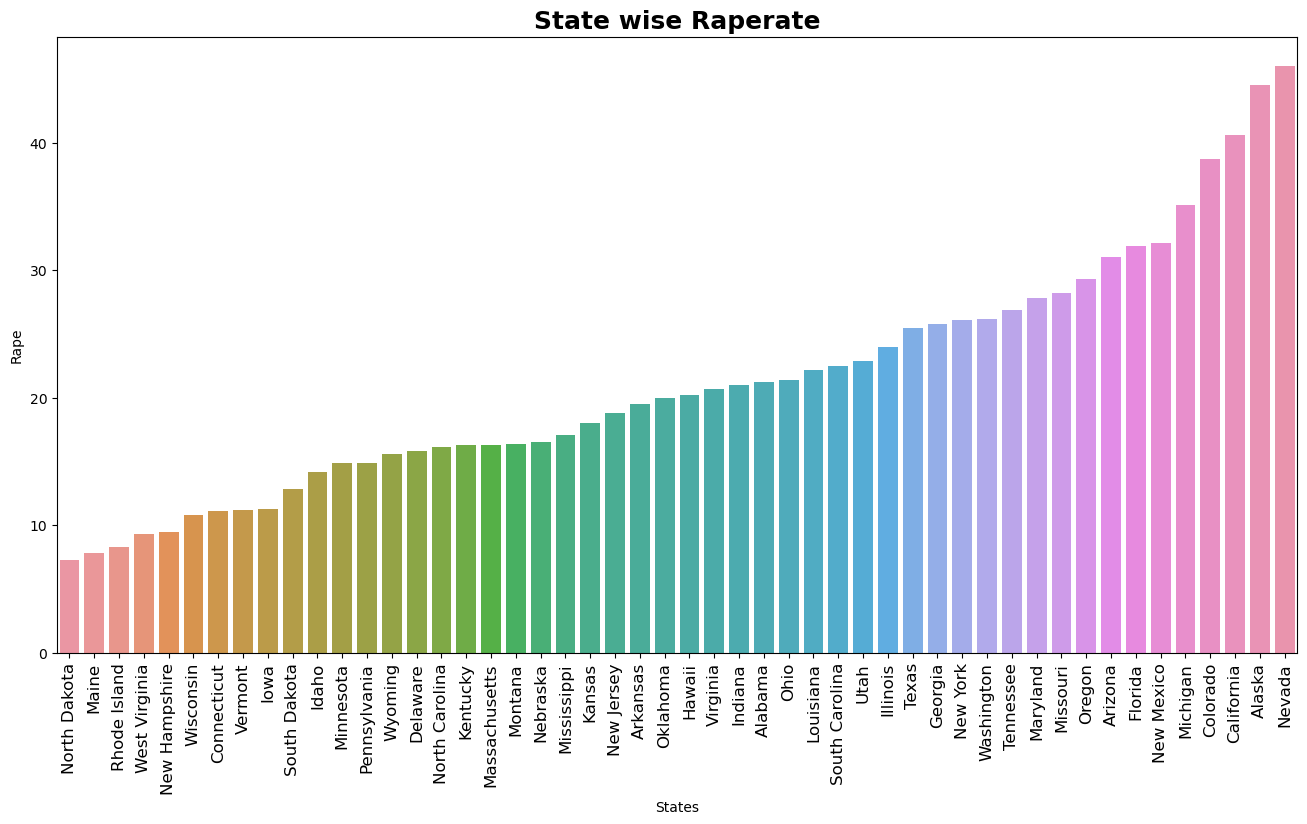

In [26]:
# Visualizeing features State wise
for i in Crime.columns[1:]:
    plt.figure(figsize=(16,8))
    sns.barplot(x=Crime["States"],y = i, data=Crime,order= Crime.sort_values(i).States)
    plt.xticks(rotation = 90,fontsize=12)
    plt.title("State wise "+str(i)+ "rate" , fontsize =18, fontweight = 'bold')
    plt.show

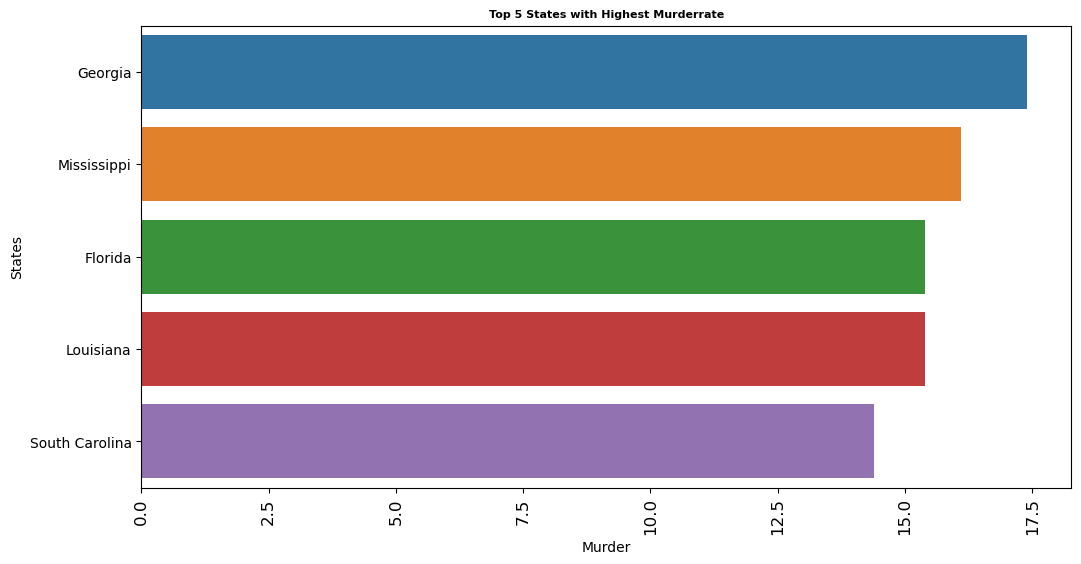

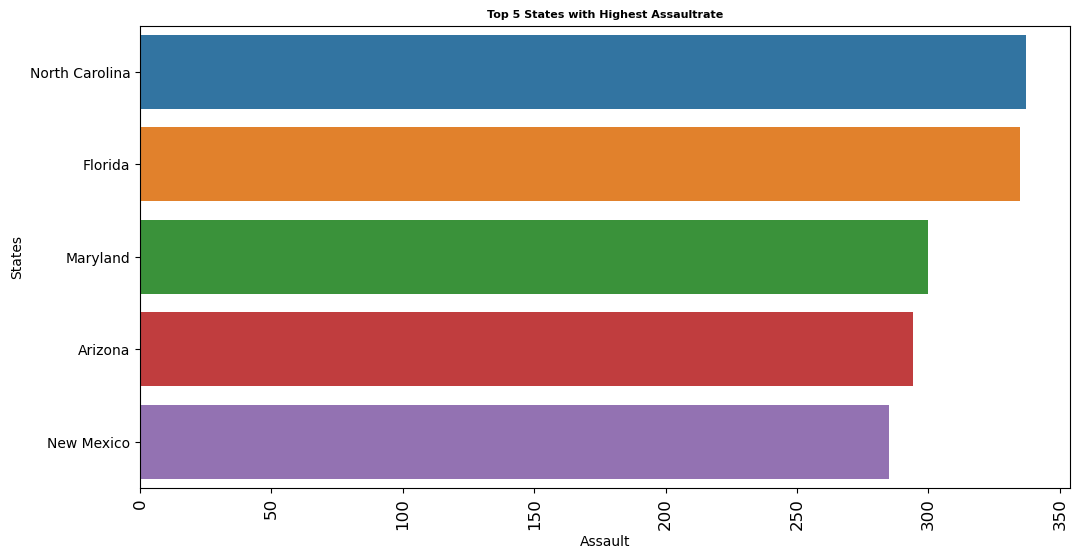

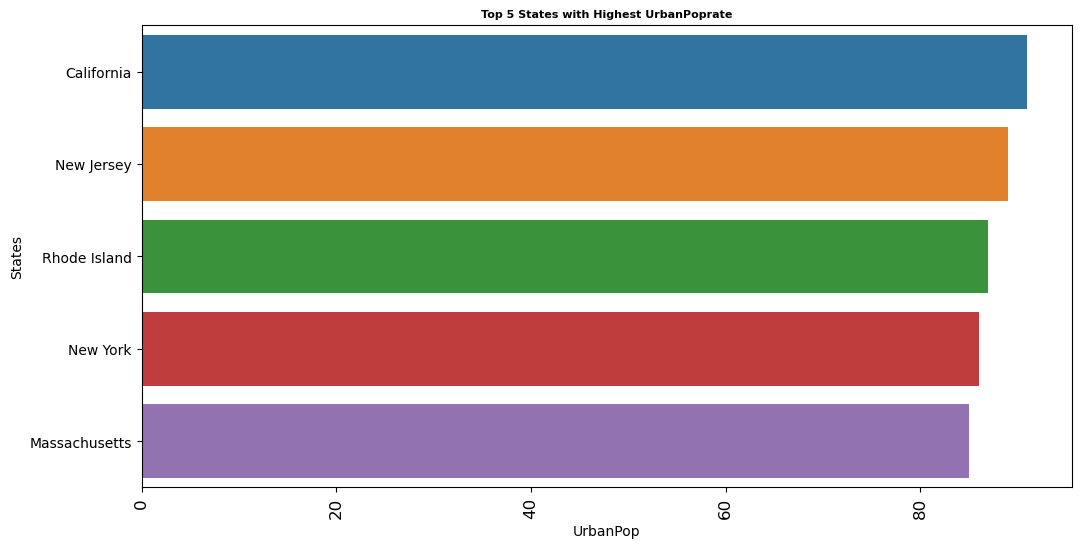

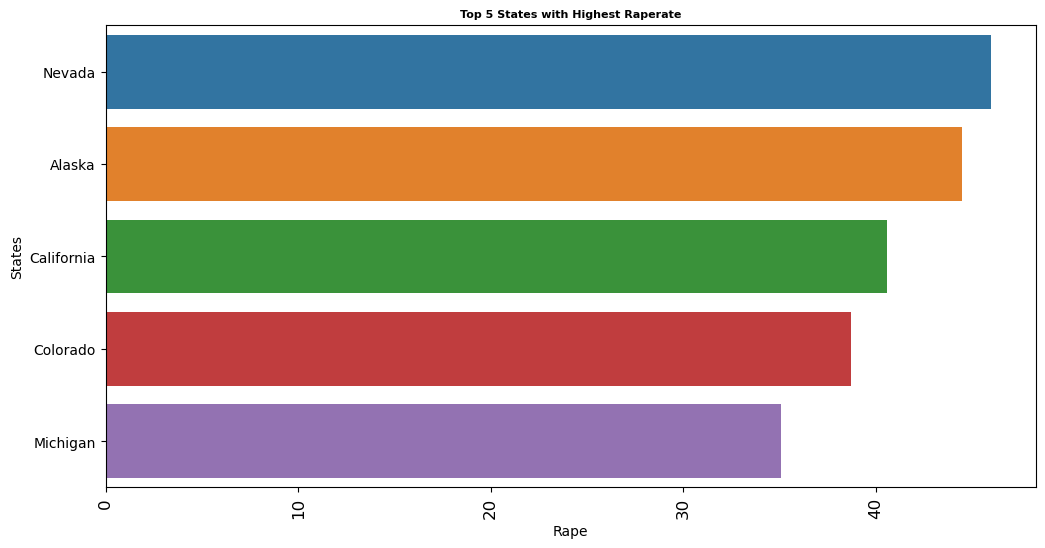

In [39]:
for i in Crime.columns[1:]:
    plt.figure(figsize = (12,6))
    sns.barplot(x=i,y = "States",data= Crime, order = Crime.sort_values(i,ascending=False)["States"][:5])
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("Top 5 States with Highest "+str(i)+"rate",fontsize=8,fontweight = 'bold')
    plt.show()

In [ ]:
Observation 
# In Florida the Murder rate and Assualt rate are high
# in California the Urban population is high due to which the Rape rate is also high
# But in other countries we don't see much resemblence

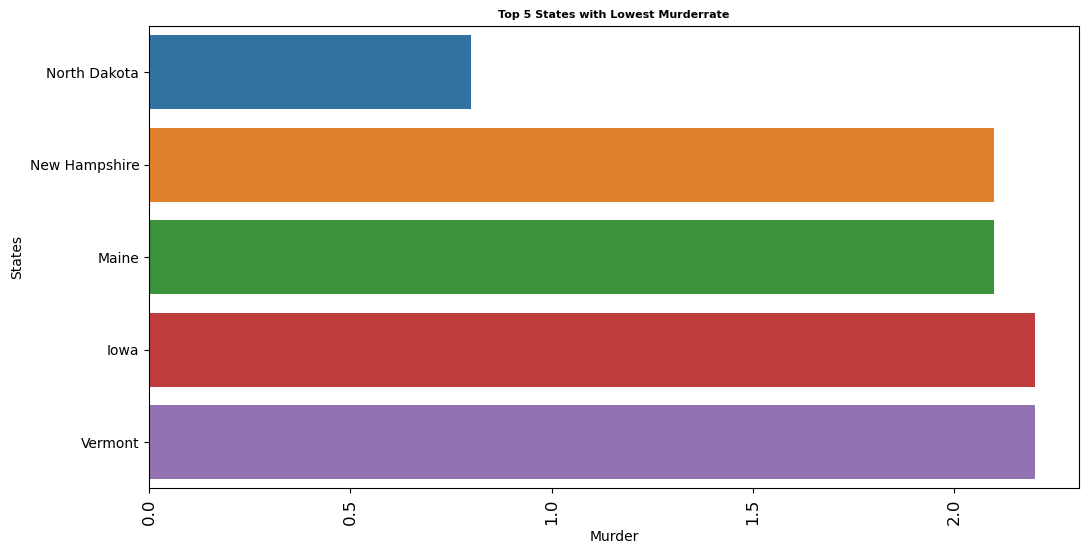

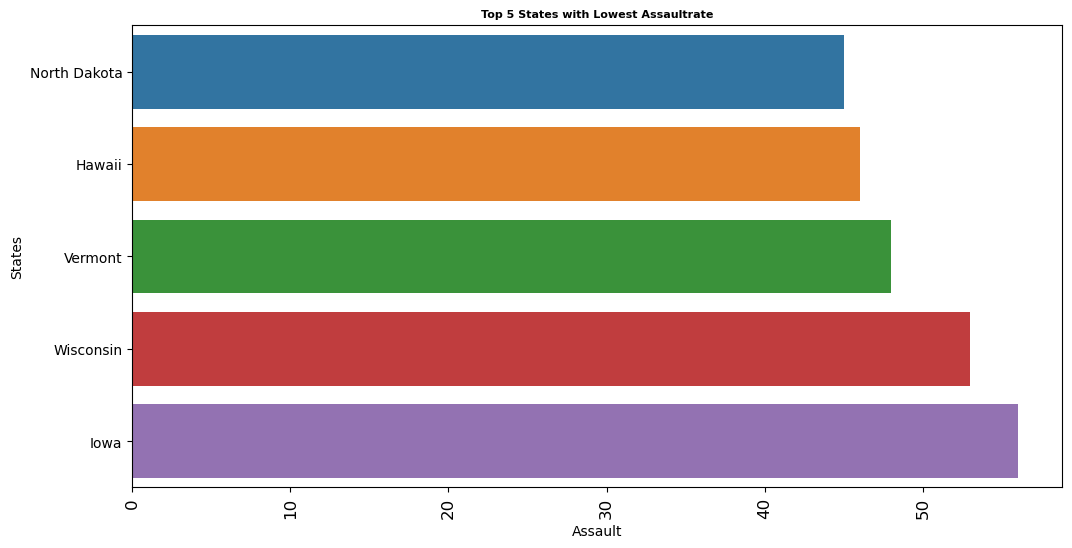

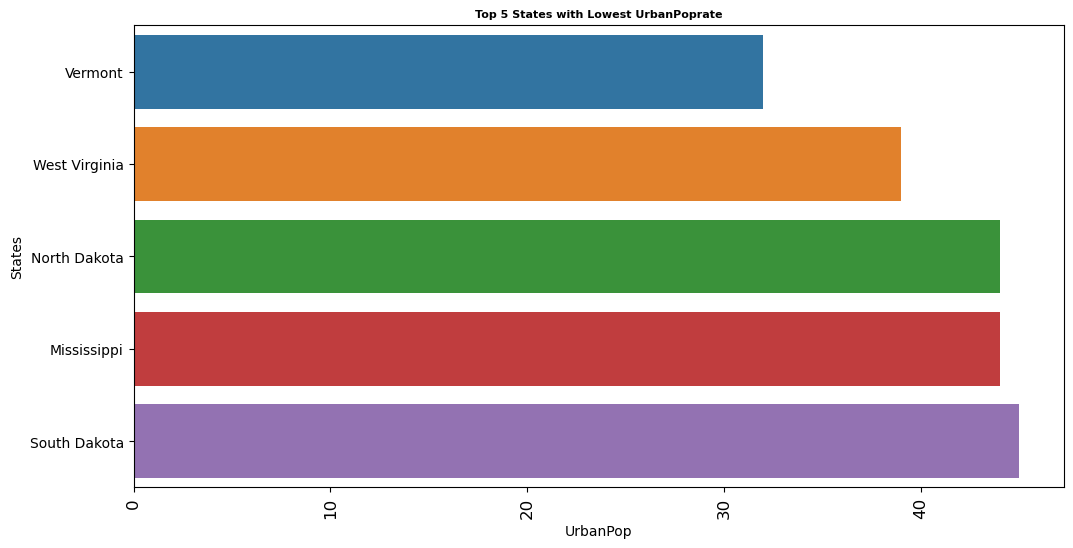

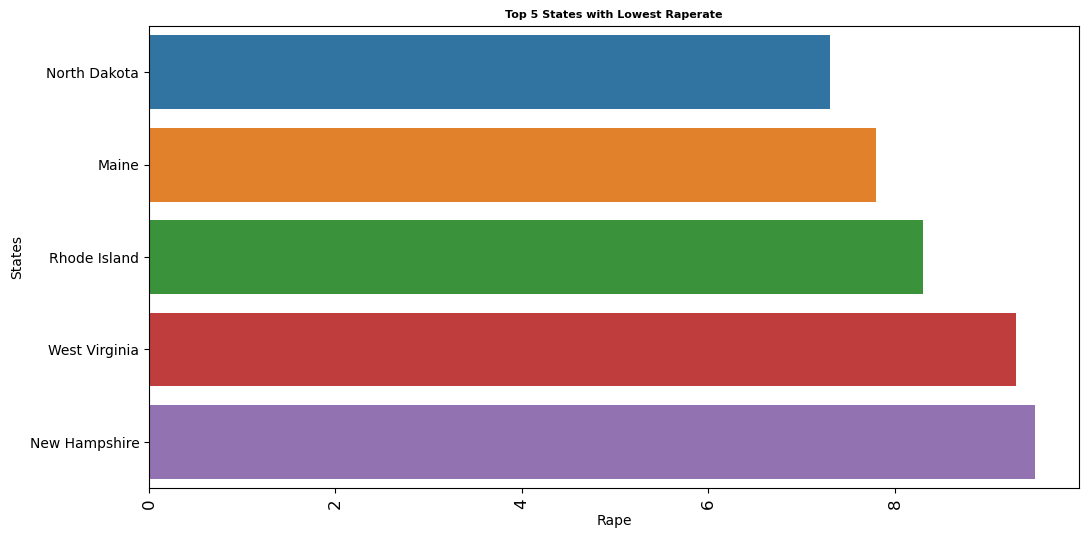

In [41]:
for i in Crime.columns[1:]:
    plt.figure(figsize = (12,6))
    sns.barplot(x=i,y = "States",data= Crime, order = Crime.sort_values(i,ascending=True)["States"][:5])
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("Top 5 States with Lowest "+str(i)+"rate",fontsize=8,fontweight = 'bold')
    plt.show()

In [ ]:
*Observation 
#WE can clearly see that the North Dakota has lowest crime rate and urban 
population is also less.
#Vermont with lowest urban population has the low murder rate and assault rate
#But in the other countries we don't see much resemblesnce.

In [42]:
Crime_Mcrime = Crime.drop(["States"],axis = 1)
Crime_Mcrime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [45]:
Standard_scaler = StandardScaler()
Crime_std = Standard_scaler.fit_transform(Crime_Mcrime)
Crime_std.shape

(50, 4)

In [46]:
# Normalizing the data
Min_max = MinMaxScaler()
Crime_norm = Min_max.fit_transform(Crime_Mcrime)
Crime_norm.shape

(50, 4)

In [ ]:
 Hierarchical Cluster

<function matplotlib.pyplot.show(close=None, block=None)>

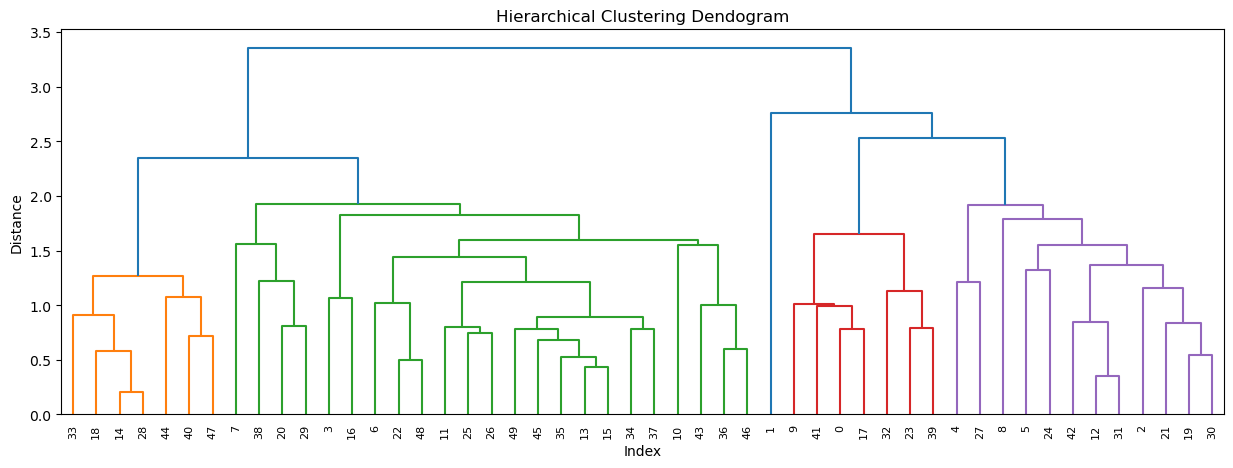

In [49]:
Z = linkage(Crime_std,method = "average",metric = "euclidean")
plt.figure(figsize = (15,5))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(Z)
plt.show

In [50]:
for nc in range (2,6):
    h_cluster = AgglomerativeClustering(n_clusters=nc,linkage = 'average', affinity = 'euclidean').fit(Crime_std)
    cluster_labels = pd.Series(h_cluster.labels_)
    slht_scr = sklearn.metrics.silhouette_score(Crime_std,cluster_labels)
    print("For n_clusters = ", nc, "The average silhouette_score is :", slht_scr)
    

For n_clusters =  2 The average silhouette_score is : 0.4084890326217641
For n_clusters =  3 The average silhouette_score is : 0.34863679190476177
For n_clusters =  4 The average silhouette_score is : 0.3636819420151221
For n_clusters =  5 The average silhouette_score is : 0.3212682619092323


In [51]:
h_cluster = AgglomerativeClustering(n_clusters=4,linkage='average',affinity = 'euclidean').fit(Crime_std)
cluster_labels = pd.Series(h_cluster.labels_)
cluster_labels
Crime['clust'] = cluster_labels
Crime

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [52]:
Crime.iloc[:,1:].groupby(Crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.870000,114.433333,63.633333,15.943333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0


In [56]:
h_cluster_0 = Crime[(Crime.clust==0)]
h_cluster_0

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [58]:
h_cluster_1 = Crime[(Crime.clust==1)]
h_cluster_1

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [60]:
h_cluster_2 = Crime[(Crime.clust==2)]
h_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


In [61]:
h_cluster_3 = Crime[(Crime.clust==3)]
h_cluster_3

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [ ]:
Observation
* we can observation that Cluster-2 contains only one Observation,that is of state 'Alaska'
*'Alaska' has low urban population rate, but it has high Rape rate when
compared to state 'South Calorina 'of Cluster-3 having same urban population rate that 
is the reason why it stood differently from all the cluster


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 960x480 with 0 Axes>

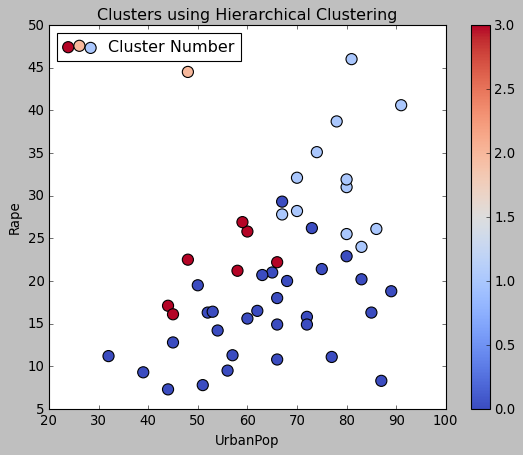

In [62]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
Crime.plot(x= 'UrbanPop', y='Rape',c=cluster_labels,label = 'Cluster Number',
          kind='scatter',s=100,cmap=plt.cm.coolwarm)
plt.title('Clusters using Hierarchical Clustering')
plt.show

<Figure size 960x480 with 0 Axes>

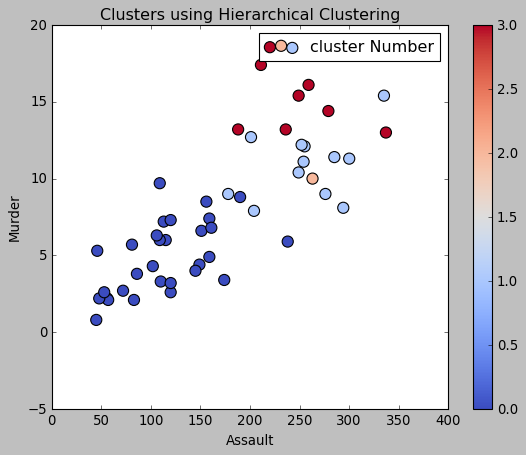

In [65]:
plt.style.use(['classic'])
plt.figure(figsize = (12,6))
Crime.plot(x='Assault',y='Murder',c=cluster_labels,label ='cluster Number',
          kind = 'scatter',s= 100,cmap = plt.cm.coolwarm)
plt.title('Clusters using Hierarchical Clustering')
plt.show()

In [68]:
#silhouette score range from -1 to 1.'-1'indicates model is not good '1'indicates model is best
#'0' indicates clusters are overlapping
slht_scr_hc = sklearn.metrics.silhouette_score(Crime_std,cluster_labels)
slht_scr_hc

0.3636819420151221

In [ ]:
############Usinng K-Means clustering model

In [69]:
from sklearn.cluster import KMeans

In [70]:
Crime = pd.read_csv("C:/Users/dell/Documents/crime_data.csv")
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


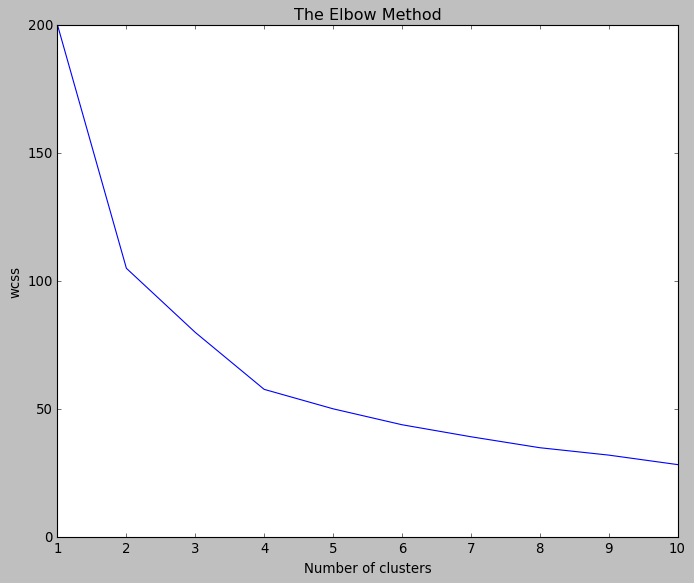

In [72]:
fig = plt.figure(figsize = (10,8))
wcss = []
for i in range(1,11):
    k_cluster = KMeans(n_clusters=i)
    k_cluster.fit(Crime_std)
    wcss.append(k_cluster.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.ylabel('wcss')
plt.xlabel('Number of clusters')
plt.show()

In [74]:
#Silhouette score range from -1 to 1."-1 " indicates model is not good ."1" indicates modelis best.
# "0" indicates clusters are overlapping
for nc in range(2,6):
    K1_cluster = KMeans(n_clusters=nc,random_state=0)
    y1_KMeans = K1_cluster.fit_predict(Crime_std)
    slht_scr = sklearn.metrics.silhouette_score(Crime_std,y1_KMeans)
    print("For n_clusters= ",nc,"The averagge silhouette_score is: ",slht_scr)

For n_clusters=  2 The averagge silhouette_score is:  0.4084890326217641
For n_clusters=  3 The averagge silhouette_score is:  0.30813622648945616
For n_clusters=  4 The averagge silhouette_score is:  0.33968891433344395
For n_clusters=  5 The averagge silhouette_score is:  0.3068468000198128


In [75]:
k_cluster = KMeans(n_clusters=4)
y_KMeans = k_cluster.fit_predict(Crime_std)



In [76]:
y_KMeans

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [77]:
k_cluster.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [78]:
k_cluster.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [79]:
#Within cluster sum of square or variance
k_cluster.inertia_

57.55425863091105

In [81]:
ks = pd.Series(y_KMeans)
Crime['clust']=ks
Crime = Crime.rename(columns={'Unnamed: 0':"States"})
Crime

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [83]:
Crime.iloc[:,1:].groupby(Crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,3.600000,78.538462,52.076923,12.176923,0.0
1,10.815385,257.384615,76.000000,33.192308,1.0
2,13.937500,243.625000,53.750000,21.412500,2.0
3,5.656250,138.875000,73.875000,18.781250,3.0


In [84]:
k_cluster_0 = Crime[Crime.clust==0]
k_cluster_0

,States,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,0
14,Iowa,2.2,56,57,11.3,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
33,North Dakota,0.8,45,44,7.3,0
40,South Dakota,3.8,86,45,12.8,0


In [85]:
k_cluster_1 = Crime[Crime.clust==1]
k_cluster_1

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [86]:
k_cluster_2 = Crime[Crime.clust==2]
k_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [87]:
k_cluster_3 = Crime[Crime.clust==3]
k_cluster_3

,States,Murder,Assault,UrbanPop,Rape,clust
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
10,Hawaii,5.3,46,83,20.2,3
13,Indiana,7.2,113,65,21.0,3
15,Kansas,6.0,115,66,18.0,3
20,Massachusetts,4.4,149,85,16.3,3
29,New Jersey,7.4,159,89,18.8,3
34,Ohio,7.3,120,75,21.4,3
35,Oklahoma,6.6,151,68,20.0,3
36,Oregon,4.9,159,67,29.3,3


<Figure size 960x480 with 0 Axes>

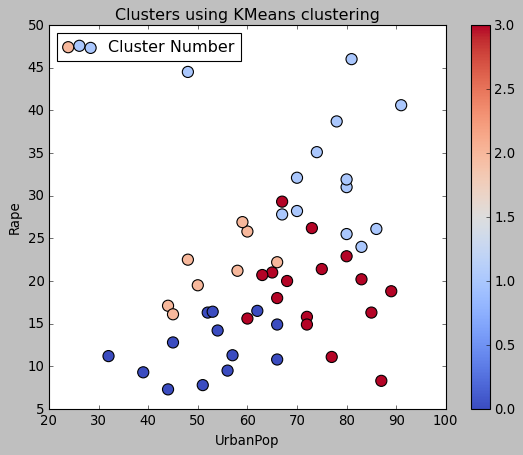

In [89]:
plt.style.use(['classic'])
plt.figure(figsize =(12,6))
Crime.plot(x='UrbanPop',y = 'Rape',c= k_cluster.labels_,label= 'Cluster Number', kind = 'scatter',s= 100,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

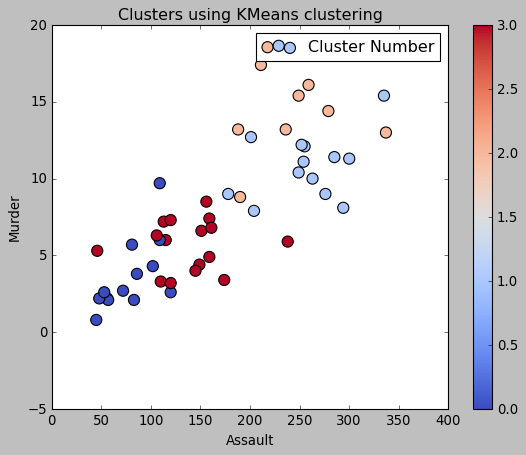

In [90]:
plt.style.use(['classic'])
plt.figure(figsize =(12,6))
Crime.plot(x='Assault',y = 'Murder',c= k_cluster.labels_,label= 'Cluster Number', kind = 'scatter',s= 100,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans clustering')
plt.show()

In [94]:
#silhouette score range from -1 to 1.'-1'indicates model is not good '1'indicates model is best
#'0' indicates clusters are overlapping
slht_scr_kc = sklearn.metrics.silhouette_score(Crime_std,k_cluster.labels_)
slht_scr_kc

0.33968891433344395

In [95]:
## DB SCAN


In [97]:
# Nearest neighbours = 2x(no.of Dimensions/columns)
nn = NearestNeighbors(n_neighbors=8)
nn = nn.fit(Crime_std)
distances, indicates = nn.kneighbors(Crime_std)

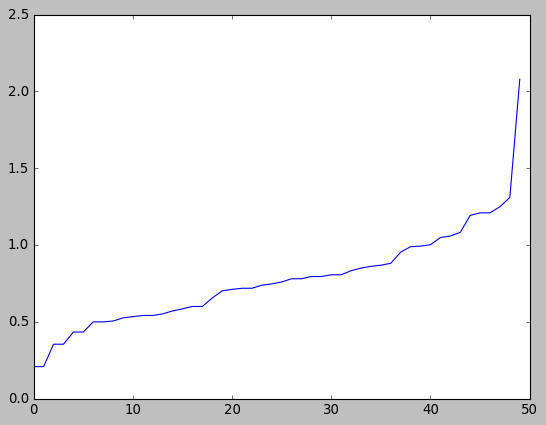

In [98]:
distances = np.sort(distances,axis = 0)
distances = distances[:,1]
plt.plot(distances)

In [99]:
# min_samples = (no.of Dimensions/columns)
d_cluster = DBSCAN(eps =1.25,min_samples=5)
d_cluster.fit(Crime_std)

DBSCAN(eps=1.25)

In [100]:
d_cluster.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [101]:
ds= pd.Series(d_cluster.labels_)
Crime['clust']=ds
Crime

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [102]:
Crime.iloc[:,1:].groupby(Crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
-1,12.616667,287.000,64.833333,32.700000,-1.0
0,14.720000,232.600,58.200000,23.720000,0.0
1,10.328571,263.000,76.857143,30.685714,1.0
2,5.243750,119.125,64.343750,16.625000,2.0


In [103]:
d_cluster_neg1 = Crime[(Crime.clust==-1)]
d_cluster_neg1

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
8,Florida,15.4,335,80,31.9,-1
23,Mississippi,16.1,259,44,17.1,-1
27,Nevada,12.2,252,81,46.0,-1
32,North Carolina,13.0,337,45,16.1,-1


In [104]:
d_cluster_neg_0= Crime[(Crime.clust==0)]
d_cluster_neg_0

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [105]:
d_cluster_neg_1= Crime[(Crime.clust==1)]
d_cluster_neg_1

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
5,Colorado,7.9,204,78,38.7,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1


In [106]:
d_cluster_neg_2= Crime[(Crime.clust==2)]
d_cluster_neg_2

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2


<Figure size 960x480 with 0 Axes>

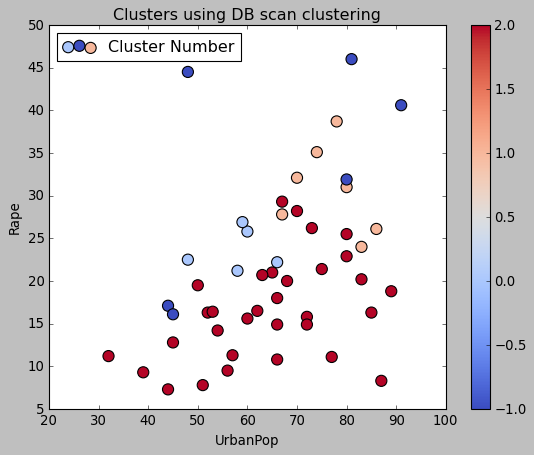

In [107]:
plt.style.use(['classic'])
plt.figure(figsize =(12,6))
Crime.plot(x='UrbanPop',y = 'Rape',c= d_cluster.labels_,label= 'Cluster Number', kind = 'scatter',s= 100,cmap=plt.cm.coolwarm)
plt.title('Clusters using DB scan clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

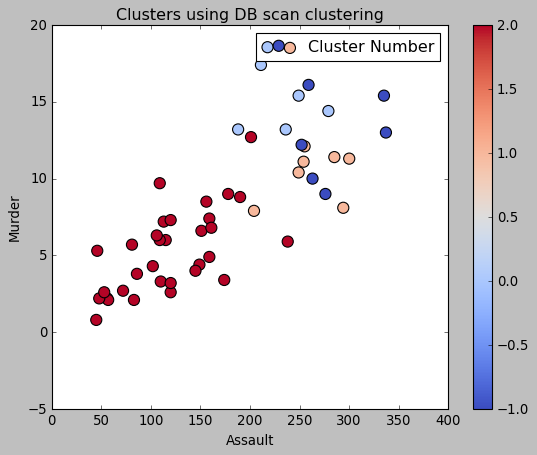

In [108]:
plt.style.use(['classic'])
plt.figure(figsize =(12,6))
Crime.plot(x='Assault',y = 'Murder',c= d_cluster.labels_,label= 'Cluster Number', kind = 'scatter',s= 100,cmap=plt.cm.coolwarm)
plt.title('Clusters using DB scan clustering')
plt.show()

In [109]:
#silhouette score range from -1 to 1.'-1'indicates model is not good '1'indicates model is best
#'0' indicates clusters are overlapping
slht_scr_dc = sklearn.metrics.silhouette_score(Crime_std,d_cluster.labels_)
slht_scr_dc

0.23869670053300915

In [110]:
print("The Silhouette score of Hierarchical Clustering:",slht_scr_hc)
print("The Silhouette score of KMeans Clustering:",slht_scr_kc)
print("The Silhouette score of DB Scan Clustering:",slht_scr_dc)

The Silhouette score of Hierarchical Clustering: 0.3636819420151221
The Silhouette score of KMeans Clustering: 0.33968891433344395
The Silhouette score of DB Scan Clustering: 0.23869670053300915
